# Batman & Fourier Versus North Korea

<div style="text-align: right; font-style: italic;">by Chocky Lab</div>

Imagine, you have decided to go on holiday to North Korea. During this trip, you have heard strange things regarding the presence of Dennis Rodman. It seems that Dennis Rodman has planned to go back to the US with Nuclear weapons ! You need to contact the Batman. Unfortunately, the bandwidth is terrific in North Korea and, of course, you don't want to stop watching your movie on Netflix.

In this context, your mission is to send the Batman logo with a minimum number of Bytes. To achieve this goal, we will process in two steps. First, we will construct a Batman logo using two bijective functions. Then, we will compress the information by using a Fourier Serie Decomposition.

## Part 1: Construct the Batman Logo

![alt text](https://amp.businessinsider.com/images/56e71048dd0895ed158b468b-750-325.png)

Except for the extremity of the bat wings, the Batman logo can be approximated by two bijective functions that describe the upper and lower part of the logo. There is a very nice discussion on [stackexchange](https://math.stackexchange.com/questions/54506/is-this-batman-equation-for-real/56150#56150) that focus on the derivation of the analytical expression for the two parts. To implement these functions, we will use the analytical expressions provided [here](!https://www.desmos.com/calculator/dnzfajfpym).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets

### Upper Part

The upper part can be approximated by an even function $f_u(t)$. For $0\le t<7$, the function can be constructed as follows:

\begin{align}
f_u(t)=\left\{\begin{array}{cl}
2.25 &\text{si } 0\le t<0.5,\\
3t+0.75&\text{si } 0.5\le t<0.75,\\
-8t+9&\text{si } 0.75\le t<1,\\
1.5-0.5t-\frac{3\sqrt{10}}{7}.(\sqrt{3-t^2+2t}- 2)&\text{si } 1\le t<3,\\
3\sqrt{1-(t/7)^2}&\text{si } 3\le t<7.\\
\end{array}\right.
\end{align}

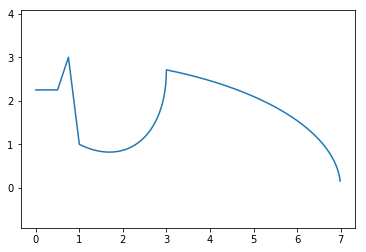

In [2]:
T_s = 0.01 #sampling period


## t >= 0
# horizontal line
t_1 = np.arange(0,0.5,T_s)
fu_1 = 2.25*np.ones(len(t_1))
# line
t_2 = np.arange(0.5,0.75,T_s)
fu_2=3*t_2+0.75
# line
t_3 = np.arange(0.75,1,T_s)
fu_3=9-8*t_3
# non linear section 1
t_4 = np.arange(1,3,T_s)
fu_4=1.5-0.5*t_4-3*(np.sqrt(10)/7)*(np.sqrt(3-t_4**2+2*t_4)- 2)
# non linear section 2
t_5 = np.arange(3,7,T_s)
fu_5 = 3*np.sqrt(1-(t_5/7)**2)

t_p = np.concatenate((t_1, t_2, t_3, t_4,t_5))
fu_p = np.concatenate((fu_1, fu_2, fu_3, fu_4, fu_5))

# draw your function
plt.plot(t_p,fu_p)
plt.axis('equal');

Nice ! Now, for $t<0$, the function can be easily constructed by using the fact the the function is even ($f(t)=f(-t)$). When exploiting this property, don't forget to remove the first element at $t=0$.

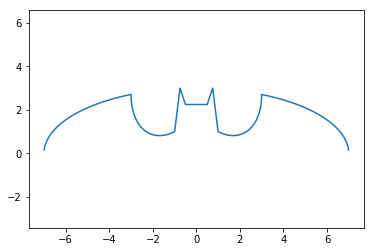

In [3]:
t_n = -np.flip(t_p[1:])
fu_n = np.flip(fu_p[1:])
t = np.concatenate((t_n,t_p))
fu = np.concatenate((fu_n,fu_p))

# draw your function
plt.plot(t,fu)
plt.axis('equal');

### Lower Part

The lower part of the logo can be also approximated by an even function. For $0\le t< 7$, this function can be divided into two parts as follows :

\begin{align}
f_l(t)=\left\{\begin{array}{cl}
\frac{t}{2}-(\frac{3}{112}\sqrt{33}-7) t^2+\sqrt{1-(|t-2|-1)^2}-3 &\text{si } 0\le t<4,\\
-3\sqrt{-(\frac{t}{7})^2+1}&\text{si } 4\le t<7,\\
\end{array}\right.
\end{align}


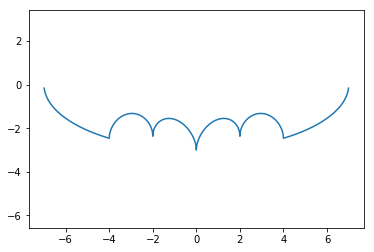

In [4]:
# first non linear part
t_1 = np.arange(0,4,T_s)
fl_1 = (t_1/2)- ((3*np.sqrt(33)-7)/112)*(t_1**2)+np.sqrt(1-(np.abs(t_1-2)-1)**2)-3 #WTF !
# second non linear part
t_2 = np.arange(4,7,T_s)
fl_2 = -3*np.sqrt(-((t_2/7)**2)+1)

# concatenate two parts (t_p has been already computed before)
fl_p = np.concatenate((fl_1, fl_2))

# even symetry
fl_n = np.flip(fl_p[1:])
fl = np.concatenate((fl_n,fl_p))

# draw your function
plt.plot(t,fl)
plt.axis('equal');

### Final Logo

The result can be obtained by plotting the two curves. The result is nice but the two functions are composed of 1399 samples. With the available bandwith in North Korea, you cannot transmit this kind of message. Furthermore, you don't want to transmit the original message to keep it secret. So, you need to compress/encrypt the information before transmission !

size of f_u: 1399 samples


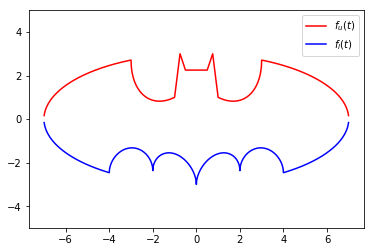

In [5]:
print("size of f_u: {} samples".format(len(fu)))

plt.plot(t,fu,"r",label="$f_u(t)$")
plt.plot(t,fl,"b",label="$f_l(t)$")
plt.legend()
plt.axis('equal');

## Part 2: Perform the Fourier Decomposition of the Logo

In the section, we will compress the Batman logo. To achieve this task, we need to describe the two signals with a reduced number of coefficients. 

Let's apply what you have learned during your signal processing courses. Thank's to the Fourier Decomposition, we know that a $T_0-$periodic function (with finite energy during one period) can be decomposed as a sum of sine waves of frequency $nf_0$ ($n\in \mathbb{N}$ and $f_0=\frac{1}{T_0}$) as follows:

$$f(t) = \alpha_0+\sum_{n=1}^{\infty}\alpha_n \cos(2j\pi n f_0 t+\varphi_n)$$

where $\alpha_n$ and $\varphi_n$ are the amplitude and the phase of the $n^{th}$ harmonics. Instead of transmitting the original message, we will only send the $L$ first harmonics since it contains most the signal information. Don't worry, Batman has a fully functional Fourier decoder in his Batcave. 

In [6]:
# fundamental frequency
T0 = (t[-1]-t[0])
f0 = 1/T0

# find_coefficients
def find_coef(signal,L=10):
    Cn = []
    
    for l in range(L+1):
        Cn_temp = (1/(len(t)))*np.sum(signal*np.exp(-2j*np.pi*l*f0*t))
        Cn.append(Cn_temp)
        
    # compute An and phin    
    An = 2*np.abs(Cn)
    An[0] = np.real(Cn[0])
    phi_n = np.angle(Cn)
        
    return An,phi_n 

def synthesis(t,An,phi_n):
    x = An[0]*np.ones(len(t))
    L = len(An)
    for n in range(1,L):
        x = x+An[n]*np.cos(2*np.pi*n*f0*t+phi_n[n])
    
    return x

We can check the signal resynthesis with $L=20$ coefficients for the upper and lower function. Note that we have clearly reduced the amount of information to be transmitted. Indeed, each function is described by $2\times 20$ coefficients ($A_n$ and $\phi_n$ coefficients) instead of 1399 samples for the original signals ! Furthermore, as the two functions are even, we can demonstrate that the $\phi_n=\{0,\pi\}$ and thus can be described by a binary value.

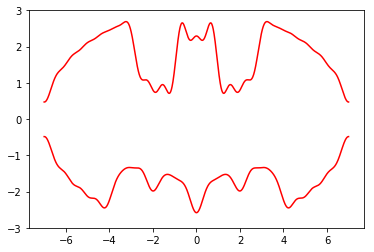

In [7]:
t_new = np.arange(-7,7,T_s)
L = 20

for f in [fu,fl]:
    An,phi_n = find_coef(f,L)
    f_new = synthesis(t_new,An,phi_n)
    plt.plot(t_new,f_new,"r")
    plt.ylim([-3,3])

Great, now you can contact the Batman with a minimum number of Bytes without stopping your movie. Hope that the Batman will warn the president before it's too late !

<div style="text-align:center;" class="h1">Good Job Dude !</div>


